## 🤖 Bouw je eerste Agent!

In het vorige lab heb je kennisgemaakt met de **Azure AI Foundry portal**. Je hebt kunnen experimenteren met de Assistant Playground waar je kon chatten met je eigen data. Echter werkte dit alleen binnen de playground-omgeving.

Nu gaan we een stap verder: **het bouwen van een eigen agent in Python code**. Dit stelt je in staat om:
- Agents programmatisch te beheren
- Custom workflows te implementeren  
- Agents te integreren in eigen applicaties
- Volledige controle te hebben over het gedrag

Laten we beginnen met het maken van een eenvoudige agent die we volledig in code kunnen aansturen!

## 🔧 Setup en Configuratie

Voordat we kunnen beginnen met het bouwen van onze agent, moeten we eerst de **AI Agents Client** correct configureren. Deze client heeft toegang nodig tot je Azure AI Foundry project en requires de volgende configuratie-informatie:

### Benodigde Environment Variables

De volgende environment variables moeten worden ingesteld in je `.env` bestand:

```bash
AI_FOUNDRY_PROJECT_ENDPOINT=https://jouw-project.cognitiveservices.azure.com/
API_KEY=jouw-api-key-hier
MODEL_DEPLOYMENT_NAME=gpt-4o
```

**Waar vind je deze informatie?**
- **AI_FOUNDRY_PROJECT_ENDPOINT**: Te vinden in je Azure AI Foundry project onder "Endpoints and Keys"
- **API_KEY**: Ook beschikbaar in de "Endpoints and Keys" sectie van je project
- **MODEL_DEPLOYMENT_NAME**: De naam van het LLM model dat je hebt gedeployed (bijvoorbeeld "gpt-4o")

### 📋 Setup Instructies

1. **Kopieer het voorbeeld bestand**: Kopieer de `.env.sample` file in deze folder
2. **Hernoem naar `.env`**: Verander de naam naar `.env` 
3. **Vul je credentials in**: Update alle waarden met je eigen project informatie
4. **Controleer de configuratie**: Zorg ervoor dat alle variabelen correct zijn ingevuld

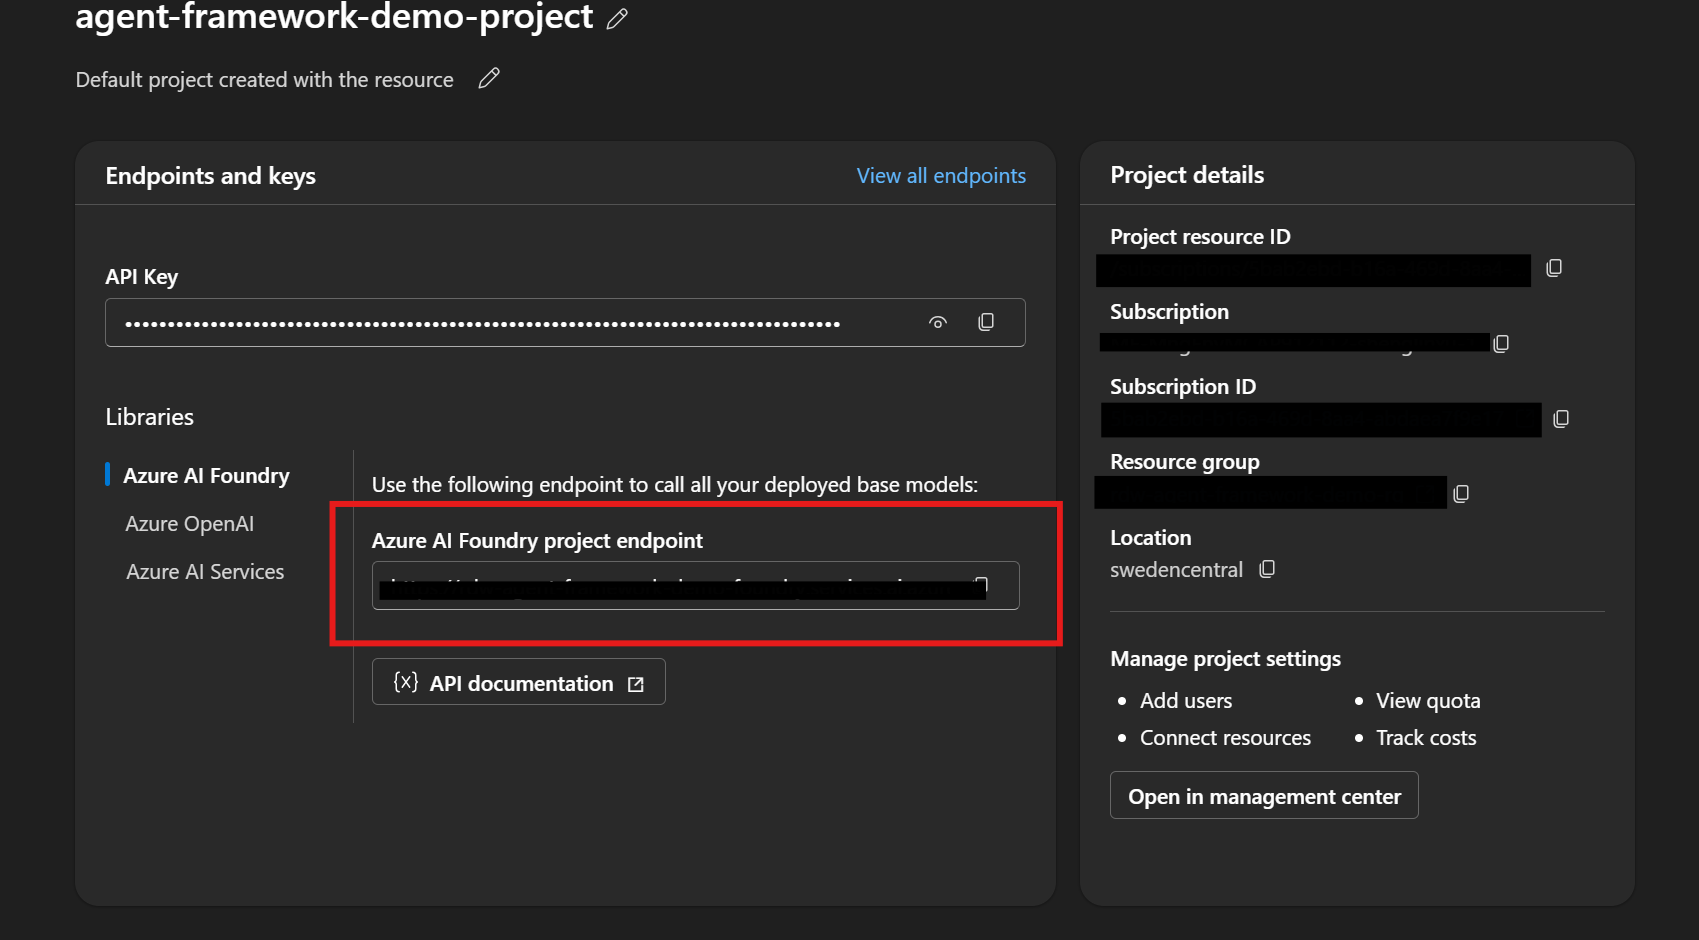



In [ ]:
from azure.identity import DefaultAzureCredential

# Initialize credentials
credential = DefaultAzureCredential()

## 🔗 Agents Client Aanmaken en Authenticeren

In de volgende cel gaan we een Agents client aanmaken die gebruik maakt van het project endpoint uit onze environment variables.

> **Opmerking:** Dit voorbeeld gebruikt de synchrone AgentsClient. Voor high-performance scenario's kun je ook een asynchrone client aanmaken door gebruik te maken van de async methoden van `AgentsClient`.

De client wordt gebruikt om:
- **Verbinding te maken** met je Azure AI Project via de `AI_FOUNDRY_PROJECT_ENDPOINT` environment variable
- **Authenticatie** uit te voeren met Azure credentials (DefaultAzureCredential)
- **Het aanmaken en beheren** van AI agents in je project mogelijk te maken

In [ ]:
import os
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
from dotenv import load_dotenv

# Reload .env to ensure we have latest values
load_dotenv(override=True)

project_client = AIProjectClient(
    endpoint=os.environ.get("AI_FOUNDRY_PROJECT_ENDPOINT"),
    credential=DefaultAzureCredential(),
)
agents_client= project_client.agents

## 🤖 Specialistische Agent met Function Calling

Nu we onze Agents client hebben geconfigureerd, gaan we direct een **gespecialiseerde energie calculator agent** bouwen die praktische berekeningen kan uitvoeren! Laten we meteen met een agent die **function calling** gebruikt aanmaken.

### ⚡ Het Concept: Function Calling

**Function calling** is het vermogen van AI agents om specifieke Python functies uit te voeren op basis van conversatie context. Dit betekent dat onze agent niet alleen praat, maar ook daadwerkelijk berekeningen kan uitvoeren.

**Hoe werkt dit?**
1. We definiëren een Python functie met specifieke parameters
2. We registreren deze functie als een "tool" bij onze agent
3. Wanneer de agent een relevante vraag krijgt, herkent hij automatisch dat er een berekening nodig is
4. De agent roept de functie aan met de juiste parameters
5. Het resultaat wordt gebruikt om een intelligent antwoord te formuleren

### 💡 Praktisch Voorbeeld: Energie Kosten Calculator

De onderstaande cel bevat een `calculate_energy_cost` functie die we direct aan de agent meegeven als tool. Deze functie kan:

- **Maandelijkse en jaarlijkse kosten berekenen** op basis van kWh verbruik
- **Gebruikscategorieën bepalen** (laag, gemiddeld, hoog verbruik)
- **Gepersonaliseerde besparingstips geven** afhankelijk van het verbruikspatroon
- **Potentiële besparingen inschatten** voor gebruikers met hoog verbruik

### 🔨 De Agent Workflow

Met deze functie bouwen we een agent die de volgende cyclus kan uitvoeren:
1. **Agent + Tool aanmaken** met specifieke instructies en functies
2. **Thread opzetten** voor de conversatie
3. **Bericht versturen** (bijvoorbeeld: "Bereken mijn energiekosten voor 350 kWh")
4. **Automatische berekening** - de agent herkent de vraag en roept de functie aan
5. **Intelligent antwoord** met zowel berekening als tips

**Let op**: Zorg ervoor dat je `MODEL_DEPLOYMENT_NAME` correct is ingesteld!

In [ ]:
# Define custom functions that the agent can use
def calculate_energy_cost(kwh_usage: float, rate_per_kwh: float = 0.25) -> dict:
    """
    Calculate energy costs and provide savings tips.
    
    Args:
        kwh_usage: Monthly energy usage in kWh
        rate_per_kwh: Rate per kWh in euros (default: €0.25)
    
    Returns:
        Dictionary with cost calculation and energy tips
    """
    monthly_cost = kwh_usage * rate_per_kwh
    yearly_cost = monthly_cost * 12
    
    # Determine usage category and provide tips
    if kwh_usage < 200:
        category = "Low usage - Great job!"
        tips = [
            "Continue using LED bulbs",
            "Unplug devices when not in use",
            "Use smart power strips"
        ]
    elif kwh_usage < 400:
        category = "Average usage"
        tips = [
            "Consider upgrading to energy-efficient appliances",
            "Use a programmable thermostat",
            "Seal air leaks around windows and doors",
            "Switch to LED lighting if you haven't already"
        ]
    else:
        category = "High usage - Potential for savings!"
        tips = [
            "Consider solar panels installation",
            "Upgrade to heat pump for heating",
            "Improve home insulation",
            "Use smart home energy management systems",
            "Consider time-of-use electricity rates"
        ]
    
    return {
        "monthly_cost_euros": round(monthly_cost, 2),
        "yearly_cost_euros": round(yearly_cost, 2),
        "usage_category": category,
        "energy_saving_tips": tips,
        "potential_yearly_savings": I(yearly_cost * 0.15, 2) if kwh_usage > 200 else 0
    }

# Bundle functions for the agent
user_functions = [calculate_energy_cost]
print("✅ Custom functions defined:")
print("📊 calculate_energy_cost - Calculate energy costs and get saving tips")

Probeer je eigen agent te maken door de documentatie te volgen: [Create an Agent](https://learn.microsoft.com/en-us/python/api/overview/azure/ai-agents-readme?view=azure-python#create-agent-with-function-call)

In [ ]:
from azure.ai.agents.models import FunctionTool, ToolSet

# TODO: Add the functions as tools to the agent.

## Step 1: Create a FunctionTool from your custom functions
# FunctionTool wraps your Python functions so the agent can call them

## Step 2: Create a ToolSet container
# ToolSet is a container that holds all the tools for your agent


## Step 3: Add the functions to the toolset
# This registers your function tool with the toolset


## Step 4: Enable automatic function calling
# This tells the agent client to automatically handle function calls


## Step 5: Create the agent with the toolset
# The agent is created with access to your custom functions via the toolset]

<details>
<summary>Click to see solution</summary>

```python

functions = FunctionTool(user_functions)

toolset = ToolSet()
toolset.add(functions)

agents_client.enable_auto_function_calls(toolset)

agent = agents_client.create_agent(
    model=os.environ["MODEL_DEPLOYMENT_NAME"],
    name="alliander-tools-agent",
    instructions="""You are an energy consultant with access to specialized tools.

You can help customers with:
🔧 Energy cost calculations and savings advice

When customers ask about:
- Energy bills or usage costs → Use calculate_energy_cost function

Always provide helpful context and explain the results in a friendly, customer-focused way.""",
    toolset=toolset,
)
```

</details>

## 🧪 Agent Testen en Conversatie Starten

Nu je je eerste AI agent met function calling hebt geconfigureerd, is het tijd om deze in actie te zien! In de onderstaande cellen gaan we:

1. **Een conversatie-thread aanmaken** - dit is een chat sessie waarin we met de agent kunnen communiceren
2. **Een testbericht sturen** - we vragen de agent om een energiekostenberekening uit te voeren
3. **De agent laten draaien** - we starten een "run" die de agent het bericht laat verwerken en automatisch de juiste functie laat aanroepen
4. **Het antwoord bekijken** - we zien hoe de agent de berekening uitvoert en intelligente energiebespaartips geeft

Dit toont de kracht van function calling: de agent herkent automatisch wanneer een berekening nodig is en roept de juiste Python functie aan!

In [ ]:
from azure.ai.agents.models import ListSortOrder, MessageRole

agent_id = agent.id

# Create a thread for communication with the agent
thread = agents_client.threads.create()
print(f"Created thread, ID: {thread.id}")

# Store the thread ID while we're still in the with block
thread_id = thread.id

# Send a message to the thread
message = agents_client.messages.create(
    thread_id=thread.id,  # ID of the thread
    role=MessageRole.USER,  # Role of the message sender (e.g., user)
    content="Can you calculate the energy costs and offer advice, my usage is 300 kwH based on cost 1",  # Message content
)

print(f"Created message, ID: {message['id']}")

In [ ]:
# Create and process an agent run in the thread using the tools
run = agents_client.runs.create_and_process(thread_id=thread.id, agent_id=agent.id)
print(f"Run finished with status: {run.status}")

if run.status == "failed":
    # Log the error if the run fails
    print(f"Run failed: {run.last_error}")

# Fetch and log all messages from the thread
messages = agents_client.messages.list(thread_id=thread.id, order=ListSortOrder.ASCENDING)
for message in messages:
    # Only show the agent's response, not the user's question
    if message.role == MessageRole.AGENT:
        if message.content and len(message.content) > 0:
            content_item = message.content[0]
            if content_item.get('type') == 'text' and 'text' in content_item:
                agent_response = content_item['text']['value']
                print("\n🤖 Agent Response:")
                print("="*60)
                print(agent_response)
                print("="*60)
                break  # Only show the first agent response

# Now the IDs are stored and available for reuse in subsequent cells
print(f"\n📝 Stored for reuse: Agent ID = {agent_id}, Thread ID = {thread_id}")

## 🌐 Agent Beheer in Azure AI Foundry Portal

Geweldig! Je hebt nu succesvol je eerste AI agent met function calling aangemaakt. Een van de krachtige aspecten van Azure AI Foundry is dat je **programmatisch aangemaakte agents** ook kunt beheren via de webportal.

### Je Agent Bekijken in de Portal

Ga naar de **Azure AI Foundry portal** en navigeer naar de **"Agents"** sectie. Hier kun je:

- **Je agent zien** die je zojuist in code hebt aangemaakt
- **De configuratie bekijken** inclusief de instructies en tools die je hebt toegevoegd
- **Conversatie geschiedenis inzien** van alle interacties met je agent
- **Agent instellingen aanpassen** via de grafische interface indien gewenst
- **Nieuwe agents aanmaken** en bestaande agents beheren

Dit toont de naadloze integratie tussen **programmtische development** en **visuele management** in Azure AI Foundry!

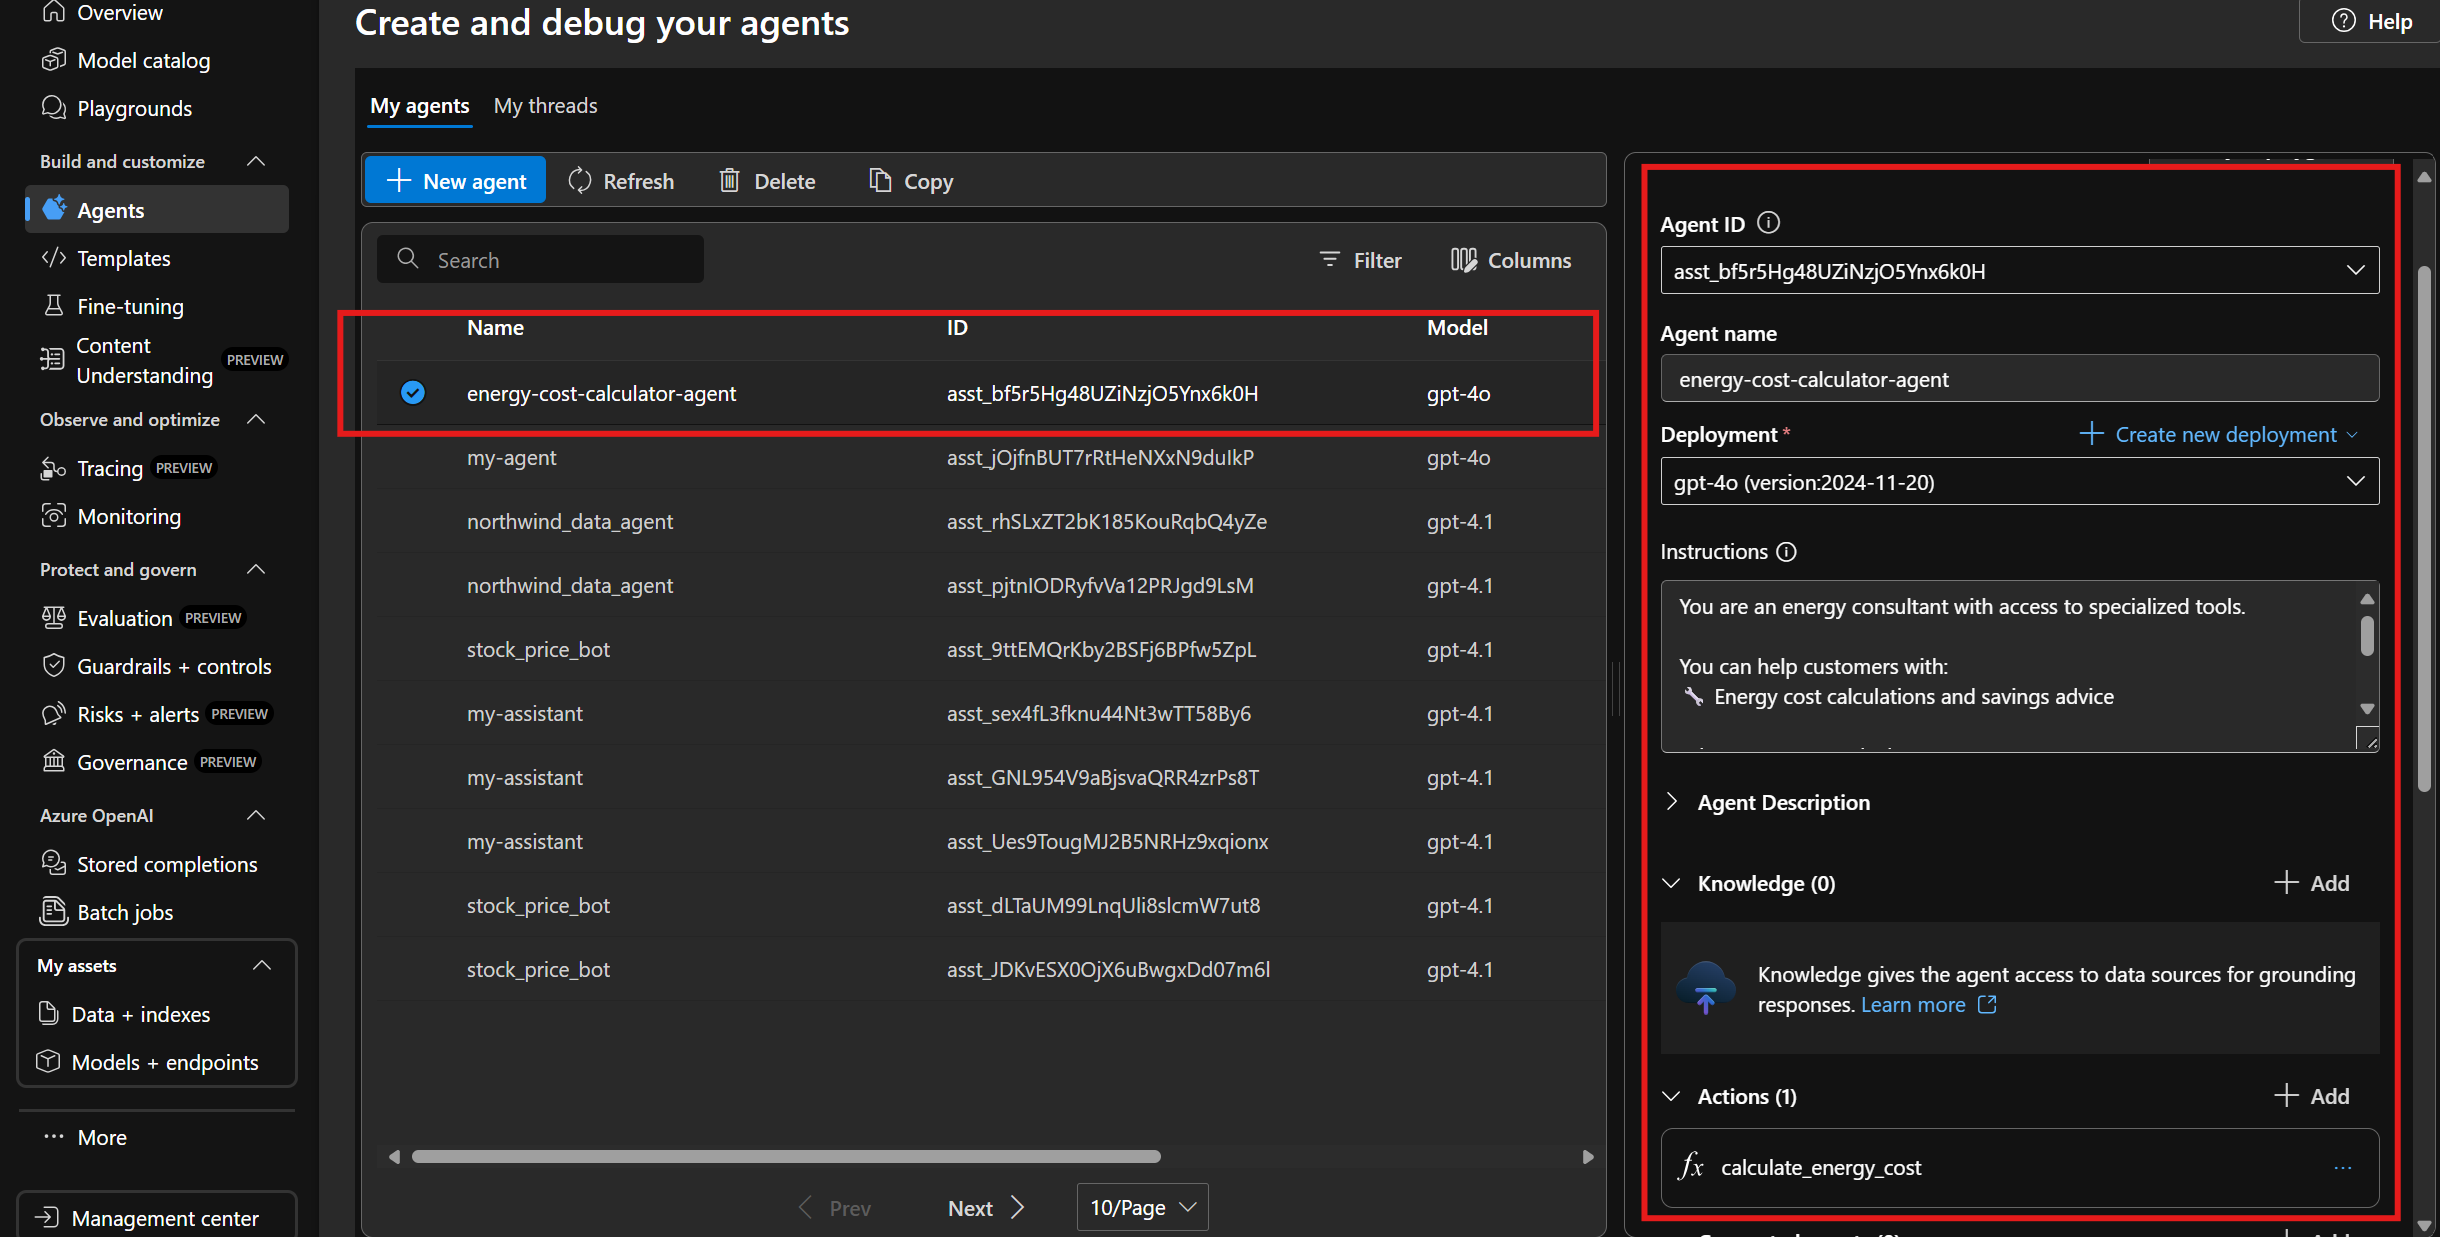

## 🧹 Resources Opruimen

Het is belangrijk om de agents en threads die we hebben aangemaakt op te ruimen om onnodige resource-gebruik te voorkomen. De onderstaande cel zal de thread en agent verwijderen die we hierboven hebben aangemaakt.

In [ ]:
try:
    # Delete the thread first
    if thread_id:
        agents_client.threads.delete(thread_id=thread_id)
        print(f"✅ Deleted thread: {thread_id}")
    
    # Delete the agent
    if agent_id:
        agents_client.delete_agent(agent_id=agent_id)
        print(f"✅ Deleted agent: {agent_id}")
        
    print("\n🧹 Cleanup completed successfully!")
    
except Exception as e:
    print(f"⚠️ Error during cleanup: {e}")
    print("This might happen if the resources were already deleted or don't exist.")